In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras_tqdm import TQDMNotebookCallback
 
from settings import *
import eb_models
from preprocessing import load_npz, make_dataset, normalize

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
batch_size = 128
num_classes = 1
epochs = 150
cut_len = 1024

In [3]:
data0_list = []
data1_list = []
for sector in [1, 2, 3, 5]:
    npzpath0 = os.path.join(datdir, "%s_0.npz" % sector)
    npzpath1 = os.path.join(datdir, "%s_1.npz" % sector)
    data1 = load_npz(npzpath1)
    data0 = load_npz(npzpath0)[:data1.shape[0]]
    data0 = make_dataset(data0, cut_len)
    data1 = make_dataset(data1, cut_len)
    data0_list.append(data0)
    data1_list.append(data1)
data0 = np.vstack(tuple(data0_list))
data1 = np.vstack(tuple(data1_list))
label0 = np.zeros(data0.shape[0])
label1 = np.ones(data1.shape[0])
data = np.vstack((data0, data1))
label = np.hstack((label0, label1))
data = normalize(data)

In [4]:
data

array([[ 1.5142307e-06, -2.8765173e-06, -7.7914001e-06, ...,
        -1.9440876e-04, -4.9616810e-05, -9.2338551e-06],
       [-2.3946377e-05, -2.2343585e-05, -2.2877270e-05, ...,
        -1.0366026e-04, -1.4081593e-05,  8.5256515e-06],
       [ 3.1207273e-05,  2.9573805e-05,  2.8643039e-05, ...,
        -2.3639045e-04, -7.3634961e-05, -4.4697590e-05],
       ...,
       [ 1.4750436e-05,  1.1183080e-05,  5.4526195e-06, ...,
         1.7722750e-05,  1.7722750e-05,  1.7722750e-05],
       [ 4.1253525e-06,  5.5377081e-06,  5.9585209e-06, ...,
        -9.2674272e-06, -9.2674272e-06, -9.2674272e-06],
       [ 1.9936213e-05,  2.2029857e-05,  2.4407707e-05, ...,
        -1.2197197e-05, -1.2197197e-05, -1.2197197e-05]], dtype=float32)

In [5]:
#分割
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

In [6]:
#keras用にデータをreshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18512, 1024, 1), (4628, 1024, 1), (18512, 1), (4628, 1))

In [7]:
model = eb_models.Model().model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1024, 16)          96        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 512, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 512, 32)           2592      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 256, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 256, 64)           10304     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 128, 64)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 128, 64)           20544     
__________

In [8]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.2, callbacks=[TQDMNotebookCallback()])

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1d_1/convolution/Conv2D}}]]
	 [[{{node metrics/acc/Mean_1}}]]

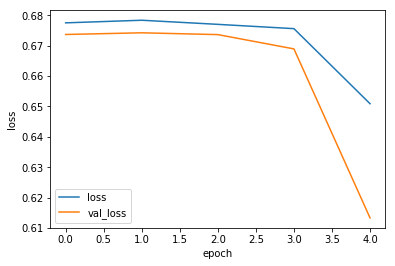

In [25]:
plt.plot(range(epochs), history.history["loss"], label="loss")
plt.plot(range(epochs), history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend() 
plt.show()

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6170028271918268
Test accuracy: 0.5375972342779642


In [27]:
model.save('model.h5', include_optimizer=True)

In [28]:
model = load_model('model.h5', compile=True)

In [17]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_base_init',
 '_build_input_shape',
 '_built',
 '_check_trainable_weights_consistency',
 '_compute_previous_mask',
 '_expects_training_arg',
 '_feed_input_names',
 '_feed_input_shapes',
 '_feed_inputs',
 '_get_node_attribute_at_index',
 '_inbound_nodes',
 '_init_graph_network',
 '_init_subclassed_network',
 '_initial_weights',
 '_input_coordinates',
 '_input_layers',
 '_is_compiled',
 '_is_graph_network',
 '_layers',
 '_layers_by_depth',
 '_losses',
 '_make_predict_function',
 '_make_test_function',
 '_make_train_function',
 '_network_nodes',
 '_node_ke

In [21]:
history